# Import packages

In [1]:
# Import packages

#from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore') # Configuracion warnings

In [2]:
import os
import sys
path_dir = (os.path.dirname(os.getcwd()))
sys.path.append(path_dir)

from homecredit.encoder import Encoder

# Get data

* without cleaning and encoding

In [3]:
#data = pd.read_csv('../raw_data/application_train.csv') # without cleaning and encoding

In [4]:
#df = data.copy()

In [5]:
#df.head(2)

* After cleaning and encoding

In [6]:
en = Encoder() # data_set = 'train', cols = None, newdf = None, targ= "TARGET"

In [7]:
en.__dict__.keys()

dict_keys(['prep', 'cl', 'data', 'tt', 'new_data'])

In [8]:
display(en.data.shape)
en.data.head(2) # corresponds to data = pd.read_csv('../raw_data/application_train.csv') 
                # without cleaning and encoding

(251754, 122)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
en.data = en.data.drop(columns= "FLAG_OWN_REALTY")
en.prep.data = en.prep.data.drop(columns= "FLAG_OWN_REALTY")
display(en.data.shape)

(251754, 121)

In [10]:
encoded_df = en.execute() # data_topredict=False ---> encoding 'train' data
encoded_df.head(2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,terraced house,Block,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden,No,Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0


In [11]:
y = encoded_df['TARGET']
X = encoded_df.drop(columns= 'TARGET')
X.shape

(251754, 239)

# Feature selection

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [13]:
selector_forest = SelectFromModel(RandomForestClassifier(n_estimators = 15, random_state=42))
selector_forest.fit(X,y) #(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=15,
                                                 random_state=42))

In [14]:
selector_reg = SelectFromModel(estimator=LogisticRegression())
selector_reg.fit(X,y) #(X_train, y_train)

SelectFromModel(estimator=LogisticRegression())

In [15]:
selector_reg.get_support() # or selector_forest.get_support()

array([False, False, False,  True,  True,  True, False,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [16]:
print(selector_reg.estimator_.coef_.shape)
selector_reg.estimator_.coef_[0, :5]

(1, 239)


array([-1.23982691e-06, -4.49533925e-08, -7.03705445e-07,  3.21571262e-06,
        5.11164868e-06])

In [17]:
selector_reg.threshold_

1.7799794159476974e-06

In [18]:
# if using LogisticRegression
selected_features= X.columns[(selector_reg.get_support())].tolist()
len(selected_features), len(X.columns)

(8, 239)

In [19]:
# if using RandomForestClassifier
selected_features_for= X.columns[(selector_forest.get_support())].tolist()
len(selected_features_for), len(X.columns)

(64, 239)

In [20]:
#selector_forest.transform(X) # to Reduce X to the selected features

In [21]:
selected_X = X.copy() #Taking a copy 
selected_X = selected_X[selected_features_for]
selected_X.shape

(251754, 64)

In [22]:
selected_X.head(2)

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Working,Married,Laborers,Business Entity Type 3,Self-employed
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,2.0,-1134.0,0.0,0.0,1.0,1,0,1,1,0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,1.0,-828.0,0.0,0.0,0.0,0,1,0,0,0


In [23]:
list(selected_X.columns)

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_WORK_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ENTRANCES_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ENTRANCES_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ENTRANCES_MEDI',

# PCA

We need to standardize variables before conducting the PCA study

* Standardize data

In [24]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [39]:
# Scaling data

n_components = 12
random_state = 42

pca = PCA() #(n_components=n_components, random_state=random_state) # or PCA()

pca_pipe = make_pipeline(StandardScaler(), pca)

# Training the PCA model 
pca_pipe.fit(selected_X)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [40]:
pca_pipe

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [41]:
# Extracting the trained model from the pipeline
model_pca = pca_pipe.named_steps['pca']
model_pca

PCA()

In [42]:
print("shape   : ", model_pca.components_.shape)
model_pca.components_

shape   :  (64, 64)


array([[ 2.81138110e-04, -2.59385294e-03,  9.14379004e-03, ...,
        -6.38164788e-03,  8.30824479e-03, -6.08941435e-03],
       [ 1.62382438e-03,  1.63892142e-02,  5.92406925e-02, ...,
        -3.36408024e-02,  9.26248221e-03, -1.77931645e-02],
       [-7.59303692e-04, -7.70741570e-02,  1.10195836e-01, ...,
        -5.46999125e-02,  1.95191863e-02, -3.58005567e-02],
       ...,
       [ 3.86535077e-05,  8.27811855e-06,  2.95407066e-05, ...,
        -1.02727310e-04, -5.27693899e-05,  8.21528994e-05],
       [-3.19612715e-05,  1.74632106e-04,  1.00687874e-05, ...,
         7.91195930e-05,  7.92526839e-06, -2.75467046e-05],
       [ 3.64189066e-05,  5.77524302e-05, -1.12258637e-05, ...,
         1.10812874e-04,  5.49842563e-05,  4.06107655e-05]])

In [43]:
index   =  ['PC'+str(i+1) for i in range(3)]
index#['PC1', 'PC2', 'PC3', 'PC4']

['PC1', 'PC2', 'PC3']

In [44]:
n_components = 64
nb = n_components  
# PCA dataframe
pca_dataframe = pd.DataFrame(
    data    = model_pca.components_, #[:4, :4]
    columns = selected_X.columns, #[:4]
    index   =  ['PC'+str(i+1) for i in range(nb)]
)

pca_dataframe

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Working,Married,Laborers,Business Entity Type 3,Self-employed
PC1,0.000281,-0.002594,0.009144,0.014851,0.016974,0.016129,0.036092,-0.002122,-0.001149,0.002384,...,-0.004953,-0.002078,0.007034,-0.000331,-0.003935,-0.011018,0.003072,-0.006382,0.008308,-0.006089
PC2,0.001624,0.016389,0.059241,0.180855,0.169641,0.181735,0.076345,-0.040716,-0.029399,0.044071,...,-0.016853,-0.029714,0.018500,0.000129,-0.016200,-0.066988,0.058260,-0.033641,0.009262,-0.017793
PC3,-0.000759,-0.077074,0.110196,0.393459,0.356865,0.394950,0.191647,-0.200080,-0.130198,-0.115424,...,-0.038743,-0.111485,0.059364,0.006428,-0.010272,-0.118743,0.061815,-0.054700,0.019519,-0.035801
PC4,0.000012,0.022327,-0.024621,-0.131637,-0.115435,-0.132485,0.009458,0.082897,0.068110,0.066832,...,-0.004444,0.046186,-0.014314,-0.006016,0.003613,0.018227,-0.031122,0.010867,0.010590,0.000295
PC5,0.000347,-0.001224,-0.005336,-0.059283,-0.047089,-0.058344,0.001038,0.032538,0.028954,0.024008,...,-0.009638,0.019592,-0.004064,-0.000624,0.000103,0.001330,-0.026449,-0.001726,0.004908,-0.000811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC60,-0.000102,0.000124,-0.000106,0.000447,0.000160,-0.000754,-0.000629,0.000171,-0.000187,-0.000314,...,0.001778,0.000068,-0.000029,0.000068,0.000114,0.000098,-0.000048,0.000121,-0.000155,-0.000195
PC61,-0.000023,-0.000369,-0.000022,0.001603,0.000084,-0.001668,-0.000021,-0.000160,-0.000096,-0.000177,...,0.004153,0.000078,-0.000184,-0.000066,-0.000067,0.000251,0.000018,0.000037,-0.000065,-0.000006
PC62,0.000039,0.000008,0.000030,0.000584,-0.000173,-0.000475,0.000319,-0.000059,-0.000004,-0.000108,...,0.021445,-0.000124,-0.000129,-0.000056,0.000176,0.000126,-0.000099,-0.000103,-0.000053,0.000082
PC63,-0.000032,0.000175,0.000010,0.000789,0.000353,-0.001116,0.000204,-0.000155,0.000095,0.000009,...,-0.706982,-0.000308,0.000031,-0.000168,0.000162,-0.000142,0.000291,0.000079,0.000008,-0.000028


In [45]:
pca_dataframe.index

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28',
       'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37',
       'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46',
       'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55',
       'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64'],
      dtype='object')

The first component mostly collects the information corresponding to ...
which are approximatively equal.

The second component mostly collects the information corresponding to ...

**The first component corresponds mainly to ..**

**The second component corresponds mainly to ..**

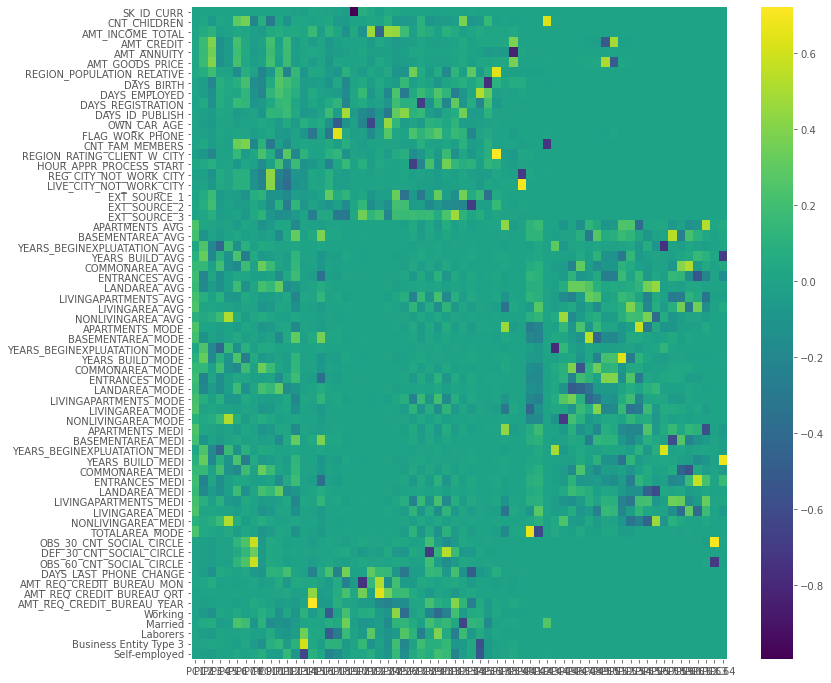

In [46]:
# Heatmap components
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
components = model_pca.components_
plt.imshow(components.T,  aspect='auto') # cmap='viridis'
plt.yticks(range(len(selected_X.columns)), selected_X.columns)
plt.xticks(range(n_components), pca_dataframe.index)
plt.grid(False)
plt.colorbar();

## Variance ratio

[2.15770223e-01 5.20633880e-02 5.02798214e-02 4.55216233e-02
 4.14446074e-02 3.85139338e-02 3.54908304e-02 3.38308631e-02
 3.00451641e-02 2.99698145e-02 2.61057350e-02 2.55029313e-02
 2.20828633e-02 1.94844068e-02 1.79072638e-02 1.74154376e-02
 1.68859024e-02 1.64551075e-02 1.60892511e-02 1.56248630e-02
 1.55505793e-02 1.52621963e-02 1.51116671e-02 1.47096660e-02
 1.41979525e-02 1.40945439e-02 1.35833564e-02 1.32236579e-02
 1.27584866e-02 1.25946701e-02 1.24347088e-02 1.21345228e-02
 1.17864457e-02 1.07946115e-02 1.00469995e-02 7.79594365e-03
 6.92506209e-03 4.81352524e-03 4.57137699e-03 2.77227568e-03
 2.34646301e-03 1.52939984e-03 6.91548500e-04 6.58908767e-04
 4.42299682e-04 4.05057576e-04 3.20588376e-04 2.65110906e-04
 2.31823233e-04 2.06142999e-04 2.03584041e-04 1.88779696e-04
 1.70524814e-04 1.19516548e-04 1.11852961e-04 1.03819741e-04
 9.01795505e-05 6.69134498e-05 5.15173374e-05 5.03890866e-05
 2.99282160e-05 2.50614880e-05 2.37603620e-05 2.05511053e-05]


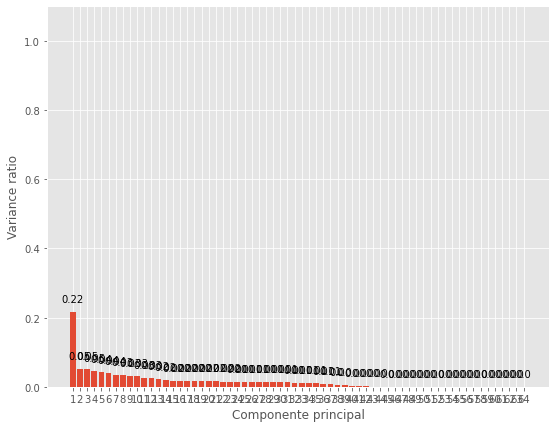

In [47]:
# variance ratio per each PCA component

print(model_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 7))
ax.bar(
    x      = np.arange(n_components) + 1 , # model_pca.n_components_)
    height = model_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(n_components) + 1, model_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(n_components) + 1) # model_pca.n_components_
ax.set_ylim(0, 1.1)
ax.set_xlabel('Componente principal')
ax.set_ylabel('Variance ratio');

The first component explains 20% of variance we observes en data
The second component explains 5%. 

[0.21577022 0.26783361 0.31811343 0.36363506 0.40507966 0.4435936
 0.47908443 0.51291529 0.54296045 0.57293027 0.599036   0.62453894
 0.6466218  0.66610621 0.68401347 0.70142891 0.71831481 0.73476992
 0.75085917 0.76648403 0.78203461 0.79729681 0.81240847 0.82711814
 0.84131609 0.85541064 0.86899399 0.88221765 0.89497614 0.90757081
 0.92000552 0.93214004 0.94392648 0.9547211  0.9647681  0.97256404
 0.9794891  0.98430263 0.988874   0.99164628 0.99399274 0.99552214
 0.99621369 0.9968726  0.9973149  0.99771996 0.99804054 0.99830566
 0.99853748 0.99874362 0.99894721 0.99913599 0.99930651 0.99942603
 0.99953788 0.9996417  0.99973188 0.99979879 0.99985031 0.9999007
 0.99993063 0.99995569 0.99997945 1.        ]


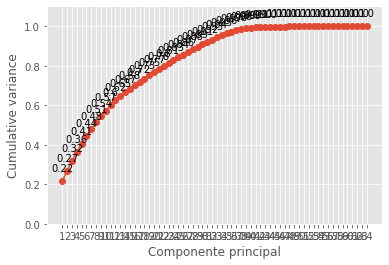

In [48]:
# Cumulative variance 
# ==============================================================================
cum_variance = model_pca.explained_variance_ratio_.cumsum()

print(cum_variance)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(n_components) + 1,
    cum_variance,
    marker = 'o'
)

for x, y in zip(np.arange(n_components) + 1, cum_variance):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(n_components) + 1) # modelo_pca.n_components_
ax.set_xlabel('Componente principal')
ax.set_ylabel('Cumulative variance');

Based on PCA1 and PCA2, we would explain the variance of data (selected_features) (25%)

## Trasformation

### Using scaler product

In [49]:
nb = n_components  

proj = np.dot(model_pca.components_, scale(selected_X).T)
proj = pd.DataFrame(proj, 
                   index   =  ['PC'+str(i+1) for i in range(nb)]
                   )
proj = proj.transpose().set_index(selected_X.index)
proj.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
0,-5.630485,-2.434620,-1.035456,0.033174,0.652488,-1.521643,1.647599,1.379292,-0.978822,1.653775,...,0.003801,-0.001666,0.000170,0.000207,-0.002576,-0.000658,-0.000966,0.000004,0.001087,0.003646
1,-2.575328,3.434130,1.256866,0.430474,-0.820801,0.100712,-0.184260,-0.294431,-0.286117,0.494148,...,0.007442,0.013211,-0.006071,-0.000773,-0.003939,-0.009241,0.004565,-0.000014,-0.004918,-0.003771
2,-0.115224,-0.990361,-1.670815,0.435776,0.234885,-1.833275,-1.872950,0.035210,0.654927,-0.299294,...,0.000040,-0.001884,-0.000704,-0.000039,-0.000945,0.000294,0.000023,-0.000299,-0.002044,-0.000694


### Using transform() method 

We can reduce the dimensionality of new observations with the transform() method
by projecting them into the space defined by the components.

In [50]:
pca_pipe

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [51]:
# Projecting
proj = pca_pipe.transform(X=selected_X)
proj = pd.DataFrame(
    proj,
    columns = ['PC'+str(i+1) for i in range(nb)],
    index   = selected_X.index
)
proj.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
0,-5.630485,-2.434620,-1.035456,0.033174,0.652488,-1.521643,1.647599,1.379292,-0.978822,1.653775,...,0.003801,-0.001666,0.000170,0.000207,-0.002576,-0.000658,-0.000966,0.000004,0.001087,0.003646
1,-2.575328,3.434130,1.256866,0.430474,-0.820801,0.100712,-0.184260,-0.294431,-0.286117,0.494148,...,0.007442,0.013211,-0.006071,-0.000773,-0.003939,-0.009241,0.004565,-0.000014,-0.004918,-0.003771
2,-0.115224,-0.990361,-1.670815,0.435776,0.234885,-1.833275,-1.872950,0.035210,0.654927,-0.299294,...,0.000040,-0.001884,-0.000704,-0.000039,-0.000945,0.000294,0.000023,-0.000299,-0.002044,-0.000694


##  Reconstruct projections

In [52]:
# Reconstruct 
reconstruct = pca_pipe.inverse_transform(X=proj)
reconstruct = pd.DataFrame(
                    reconstruct,
                    columns = selected_X.columns,
                    index   = selected_X.index
)
print('------------------')
print('Initial values')
print('------------------')
display(reconstruct.head())

print('---------------------')
print('Reconstructed values')
print('---------------------')
display(selected_X.head())

------------------
Initial values
------------------


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Working,Married,Laborers,Business Entity Type 3,Self-employed
0,100002.0,-8.326673e-16,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,...,2.000000e+00,-1134.0,-9.992007e-16,6.661338e-16,1.000000e+00,1.000000e+00,-2.220446e-16,1.000000e+00,1.000000e+00,-1.387779e-16
1,100003.0,2.720046e-15,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,...,1.000000e+00,-828.0,-4.996004e-16,1.221245e-15,8.881784e-16,-1.110223e-16,1.000000e+00,9.436896e-16,1.276756e-15,6.661338e-16
2,100004.0,3.330669e-16,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,...,4.218847e-15,-815.0,2.775558e-16,7.771561e-16,-1.554312e-15,1.000000e+00,5.551115e-16,1.000000e+00,2.220446e-16,6.383782e-16
3,100006.0,-1.110223e-15,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,...,2.000000e+00,-617.0,2.821362e-01,2.599344e-01,1.857016e+00,1.000000e+00,8.881784e-16,1.000000e+00,1.000000e+00,-2.775558e-17
4,100007.0,3.330669e-16,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,-4311.0,...,-1.998401e-15,-1106.0,-9.436896e-16,-1.110223e-16,3.552714e-15,1.000000e+00,0.000000e+00,1.110223e-16,0.000000e+00,2.775558e-16


---------------------
Reconstructed values
---------------------


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Working,Married,Laborers,Business Entity Type 3,Self-employed
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,2.0,-1134.0,0.000000,0.000000,1.000000,1,0,1,1,0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,1.0,-828.0,0.000000,0.000000,0.000000,0,1,0,0,0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0.0,-815.0,0.000000,0.000000,0.000000,1,0,1,0,0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,2.0,-617.0,0.282136,0.259934,1.857016,1,0,1,1,0
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0.0,-1106.0,0.000000,0.000000,0.000000,1,0,0,0,0
